In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def preprocess_image(image_path, target_size=(64, 64)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"error in loading image: {image_path}")
        return None
    try:
        image = cv2.resize(image, target_size)
        image = image / 255.0
        return image
    except Exception as e:
        print(f"processing image error {image_path}: {e}")
        return None

base_path = '/Users/amanda/Desktop/ROF_proj/images'
categories = ['neutral', 'masked']
processed_images = {category: [] for category in categories}

for category in categories:
    category_path = os.path.join(base_path, category)
    for celeb_folder in os.listdir(category_path):
        celeb_folder_path = os.path.join(category_path, celeb_folder)
        if os.path.isdir(celeb_folder_path):
            for filename in os.listdir(celeb_folder_path):
                if filename.endswith('.jpg'):
                    image_path = os.path.join(celeb_folder_path, filename)
                    image = preprocess_image(image_path)
                    if image is not None:
                        processed_images[category].append(image)

def flatten_images(images_dict):
    flattened_images = []
    labels = []
    for category, images in images_dict.items():
        for image in images:
            flattened_images.append(image.flatten())
            labels.append(category)
    return np.array(flattened_images), np.array(labels)

X, y = flatten_images(processed_images)

def flatten_images(images_dict):
    flattened_images = []
    labels = []
    for category, images in images_dict.items():
        for image in images:
            flattened_images.append(image.flatten())
            labels.append(category)
    return np.array(flattened_images), np.array(labels)

X, y = flatten_images(processed_images)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
n_components = 100
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
svc = SVC(C=100, kernel='rbf', gamma='scale')
svc.fit(X_train_pca, y_train)

# evaluate the model it also lables it alphabeticly 
y_pred = svc.predict(X_test_pca)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        81
           1       0.90      0.91      0.91       169

    accuracy                           0.87       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.87      0.87      0.87       250


Confusion Matrix:
 [[ 64  17]
 [ 15 154]]


In [ ]:
# check lables starting from 0 to 1
print(label_encoder.classes_)

['masked' 'neutral']


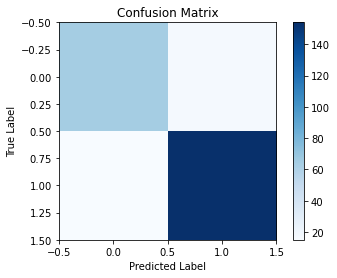

In [ ]:
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

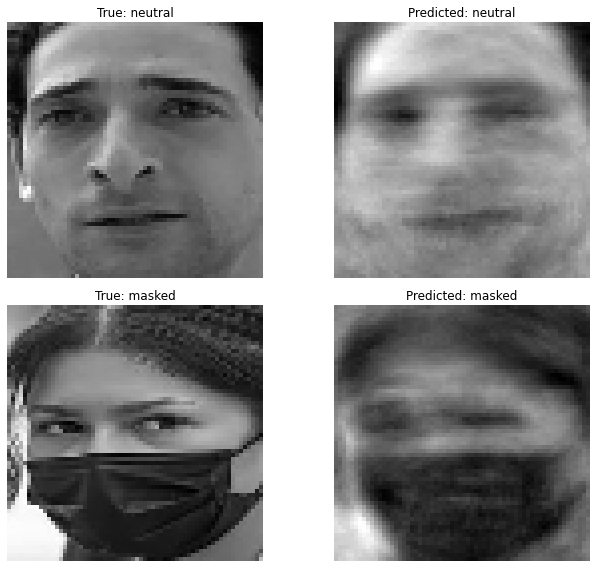

In [ ]:
def plt_face(image_vector, title=None):
    image = image_vector.reshape((64, 64))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    if title:
        plt.title(title)

correct_index = np.where(y_pred == y_test)[0][:2]
plt.figure(figsize=(10, 8))
for i, idx in enumerate(correct_index):
    # Original image
    plt.subplot(len(correct_index), 2, 2 * i + 1)
    plt_face(X_test[idx], title=f"True: {label_encoder.inverse_transform([y_test[idx]])[0]}")

    # PCA reconstructed image
    plt.subplot(len(correct_index), 2, 2 * i + 2)
    plt_face(pca.inverse_transform(X_test_pca[idx]), title=f"Predicted: {label_encoder.inverse_transform([y_pred[idx]])[0]}")

plt.tight_layout()
plt.show()

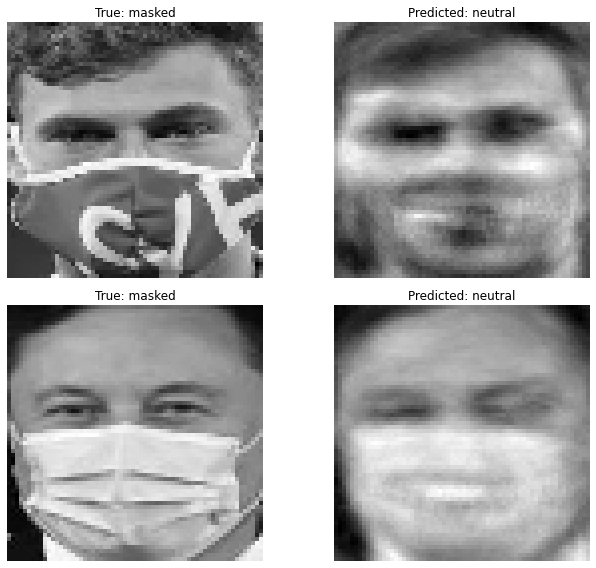

In [ ]:
def plt_face(image_vector, title=None):
    image = image_vector.reshape((64, 64))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    if title:
        plt.title(title)

wrong_indices = np.where(y_pred != y_test)[0][:2]
plt.figure(figsize=(10, 8))
for i, idx in enumerate(wrong_indices):
    # Original image
    plt.subplot(len(wrong_indices), 2, 2 * i + 1)
    plt_face(X_test[idx], title=f"True: {label_encoder.inverse_transform([y_test[idx]])[0]}")

    # PCA reconstructed image
    plt.subplot(len(wrong_indices), 2, 2 * i + 2)
    plt_face(pca.inverse_transform(X_test_pca[idx]), title=f"Predicted: 
              {label_encoder.inverse_transform([y_pred[idx]])[0]}")

plt.tight_layout()
plt.show()
